In [444]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
''' %matplotlib inline sets the backend of matplotlib to
the 'inline' backend. When using the 'inline' backend,
your matplotlib graphs will be included in your notebook,
next to the code.'''

" %matplotlib inline sets the backend of matplotlib to\nthe 'inline' backend. When using the 'inline' backend,\nyour matplotlib graphs will be included in your notebook,\nnext to the code."

# A bi-character level Probabilistic Language Model
A character level LM predicts the next chracter in a sequence given already seen some sequence of characters before it.

in name.txt we have some names, we want to create a LM to create some new names!

In [445]:
words = open('names.txt', 'r').read().splitlines()

In [446]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [447]:
len(words)

32033

In [448]:
min(len(w) for w in words)

2

In [449]:
max(len(w) for w in words)

15

# Bigram
is an LM just for predicting 2 consecutive character.

In [450]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1,ch2)

e m
m m
m a


we need to `hallucinate` some `special tokens` at the `start and end` of the words

In [451]:
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1,ch2)

<S> e
e m
m m
m a
a <E>


In bigram the simplest way to learn the probability that one character follows another character, is to count the occurrence! we need a dict for that:

In [452]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        # get( key, default (return this if not found))
        b[bigram] = b.get(bigram, 0) + 1

In [453]:
# to get the keys with highest occurrence,
# we can pair the key & values up by `item()`
# then sort them based on the 2nd item (values) using lambda
sorted(b.items(), key= lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

## Continue in Torch

In [454]:
import  torch

In [455]:
'''
To get same results when sampling during different runs.
If you are using cuDNN, you should set the deterministic behavior.
This might make your code quite slow, but might be a good method to check your code and deactivate it later.
'''
torch.backends.cudnn.deterministic = True

In [456]:
# since the entries are counts, let's use int32 types
a = torch.zeros(3,5, dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [457]:
# indexing
a[1,3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [458]:
# inplace operation
a[1,3] += 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

We need to create a `Matrix or 2D-Array (table)` with rows representing ch1 & cols for ch2, and `each entry` in this table will tell us the `number of occurrence of ch1ch2` in this order, so it will be `a non-symmetric matrix`

we have 26 character of the alphabet + 2 `<S>` `<E>` characters

In [459]:
N = torch.zeros(28, 28, dtype=torch.int32)

We can only use int for indexing the array, but we used character pairs in the dict !!

So we need a look-up table that maps characters to integers.

In [460]:
# instead of writing manually!
# take all the words, concatenate them to create a single string
''.join(words)

'emmaoliviaavaisabellasophiacharlottemiaameliaharperevelynabigailemilyelizabethmilaellaaverysofiacamilaariascarlettvictoriamadisonlunagracechloepenelopelaylarileyzoeynoralilyeleanorhannahlillianaddisonaubreyelliestellanataliezoeleahhazelvioletaurorasavannahaudreybrooklynbellaclaireskylarlucypaisleyeverlyannacarolinenovagenesisemiliakennedysamanthamayawillowkinsleynaomiaaliyahelenasaraharianaallisongabriellaalicemadelyncorarubyevaserenityautumnadelinehaileygiannavalentinaislaelianaquinnnevaehivysadiepiperlydiaalexajosephineemeryjuliadelilahariannaviviankayleesophiebriellemadelinepeytonryleeclarahadleymelaniemackenziereaganadalynnlilianaaubreejadekatherineisabellenataliaraelynnmariaathenaximenaaryaleilanitaylorfaithrosekyliealexandramarymargaretlylaashleyamayaelizabriannabaileyandreakhloejasminemelodyirisisabelnorahannabellevaleriaemersonadalynryleighedenemersynanastasiakaylaalyssajulianacharlieestherarielceciliavaleriealinamollyreesealiyahlillyparkerfinleymorgansydneyjordyneloisetrinity

In [461]:
# sets takes an input, create a set of all items,
# & doesn't allow duplicates :)
# then we want a sorted list of course, the order matters! 
chars = sorted(list(set(''.join(words))))
# a map or dict:
s_to_i = { s:i for i, s in enumerate(chars)}
s_to_i['<S>'] = 26
s_to_i['<E>'] = 27

In [462]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = s_to_i[ch1]
        idx2 = s_to_i[ch2]
        N[idx1, idx2] += 1

For Plotting this Array

In [463]:
i_to_s = { i:s for s,i in s_to_i.items()}

(-0.5, 27.5, 27.5, -0.5)

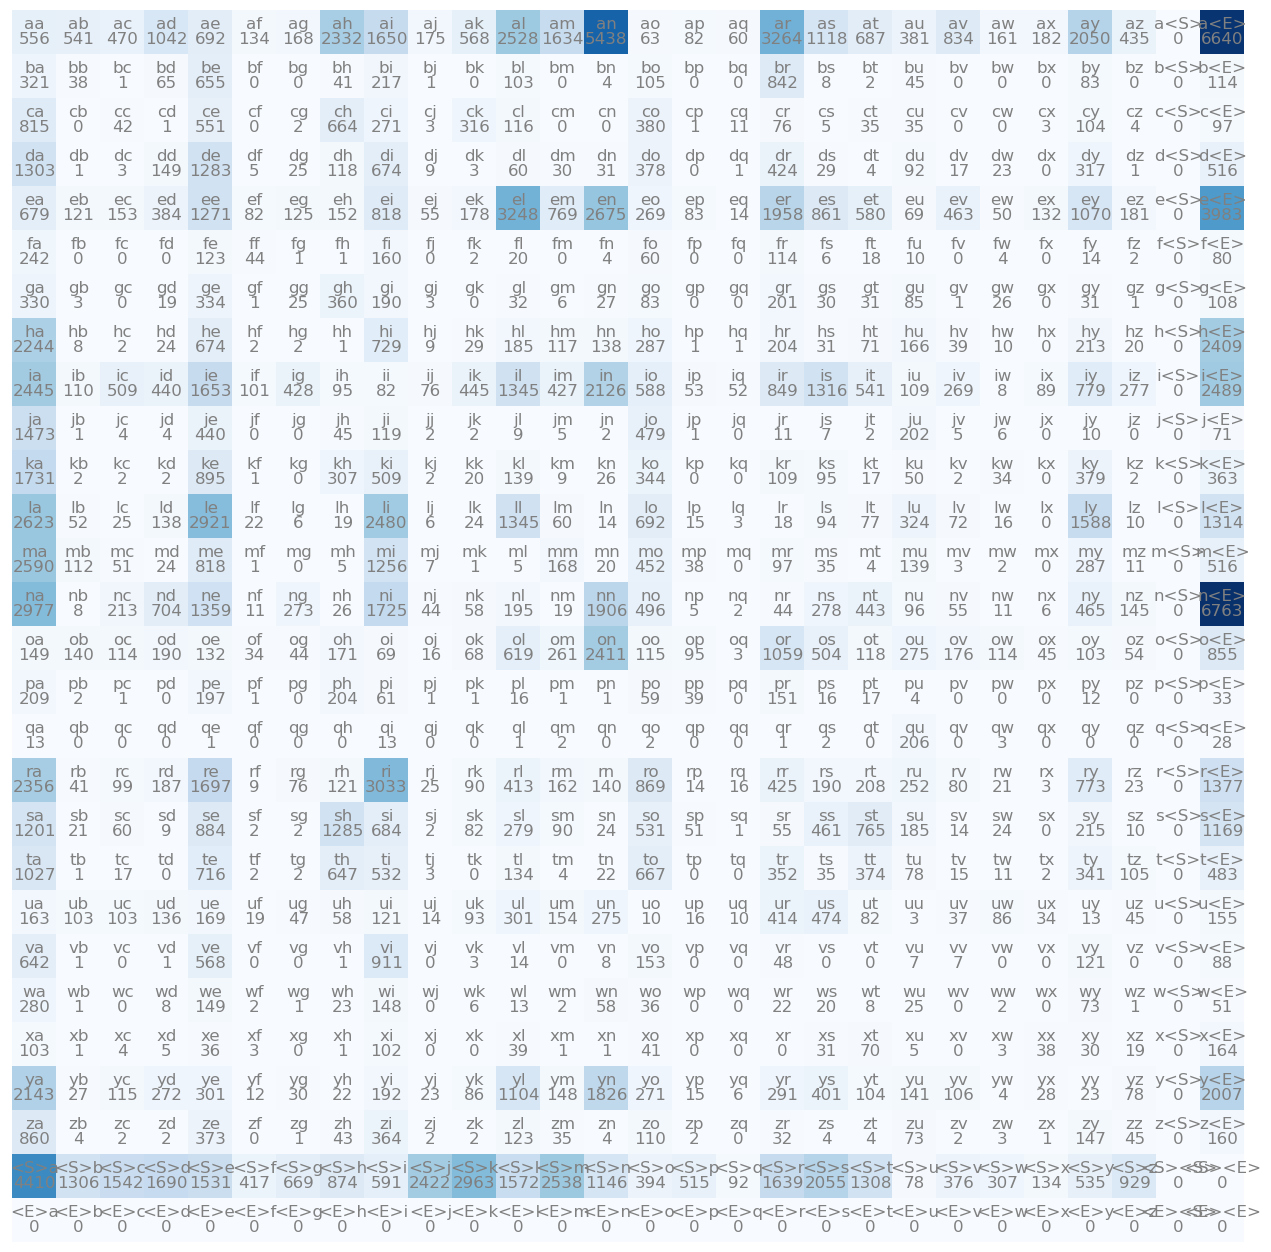

In [464]:
import itertools
# plot the heatmap
plt.figure(figsize=(16,16))
plt.imshow(N, cmap= 'Blues')
# manually write text on each cell (seaborn annot doesn't look good)
for i, j in itertools.product(range(28), range(28)):
    chstr = i_to_s[i] + i_to_s[j]
    # x:col, y:rows, the origin is top left corner, makes bottom <->top
    plt.text(x=j, y=i, s=chstr, ha='center', va='bottom', color='grey')
    plt.text(x=j, y=i, s=N[i,j].item(), ha='center', va='top', color='grey')
plt.axis('off')

Well it visually looks good, but those special tokens seems messy, like the whole row for `<E>` is 0, the same for col `<S>`, so we have redundant data.

Let's use only one special character `'.'` without `<>` for both. 

In [465]:
N = torch.zeros(27, 27, dtype=torch.int32)

In [466]:
# start from 1
s_to_i = { s:i for i, s in enumerate(chars, start=1)}

In [467]:
s_to_i['.'] = 0

In [468]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = s_to_i[ch1]
        idx2 = s_to_i[ch2]
        N[idx1, idx2] += 1

In [469]:
i_to_s = { i:s for s,i in s_to_i.items()}

(-0.5, 26.5, 26.5, -0.5)

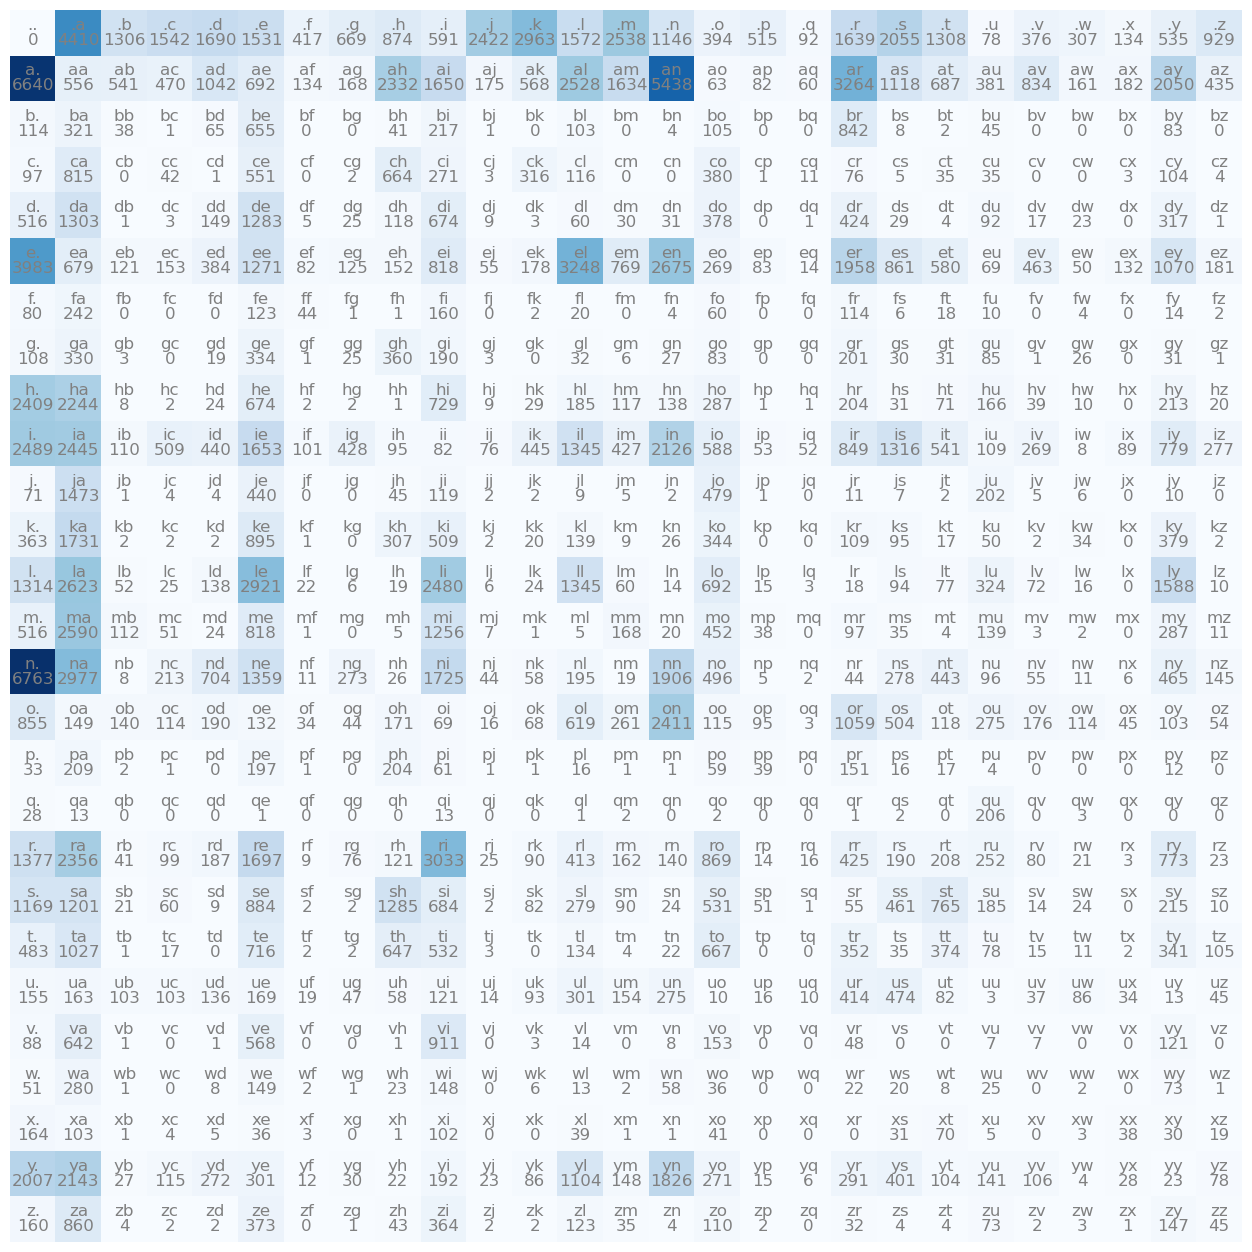

In [470]:
# plot the heatmap
plt.figure(figsize=(16,16))
plt.imshow(N, cmap= 'Blues')
# manually write text on each cell (seaborn annot doesn't look good)
for i in range(27):
    for j in range(27):
        chstr = i_to_s[i] + i_to_s[j]
        # x:col, y:rows, the origin is top left corner, makes bottom <->top
        plt.text(x=j, y=i, s=chstr, ha='center', va='bottom', color='grey')
        plt.text(x=j, y=i, s=N[i,j].item(), ha='center', va='top', color='grey')
plt.axis('off')

Now Better, 

Let's compute the probability of occurrence for all cells:

In [471]:
N[0,:] == N[0]

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True])

### Training the model with MLE
1. We assume that model is multinomial or Categorical with parameters (p1, p2, ..., p27) for all classes (ch2).

2. we wanna estimate these parameters that maximize the data Pr(all ps of all classes| D)

3. With MLE we assume no prior on parameters, so now maximize likelihood Pr(ch2 | all ps).

4. we assume class independence , so we compute these parameters for each class independently. maximize Pr(ch2_1| all ps)\*Pr(ch2_2| all ps)\*...


5. we assume iid samples, so maximize Πi Πj pr(ch2_i|ch1_j) for all ch2s & ch1s.

6. maximize the log likelihood : Σi Σj log( pr(ch2_i|ch1_j) ) for all ch2s & ch1s.

7. to make it more like a loss, minimize negative log likelihood

we have the number of counts, we can simply compute each Pr(ch2_i|ch1_j):

In [472]:
# training the model for one character '.'
p = N[0] / N[0].sum()
p.dtype

torch.float32

#### Random Generator
to make everything deterministic, use Generator object.

After creating the generator object, it's gonna generate the same sequence of random numbers for different runs. (but of course if you run a Jupyter cell multiple times without creating the generator again, you get different output for that cell)

`example:`

In [473]:
# Generator manages the state of the algorithm which produces
# pseudo random numbers. Used as a keyword argument in
# many In-place random sampling functions.
g = torch.Generator().manual_seed(2147483647)
# example :create 3 random numbers, not probabilities, just random
p = torch.rand(12, generator=g)
print(p)
# normalize them
p = p / p.sum()
p


tensor([0.7081, 0.3542, 0.1054, 0.5996, 0.0904, 0.0899, 0.8822, 0.9887, 0.0080,
        0.2908, 0.7408, 0.4012])


tensor([0.1346, 0.0674, 0.0200, 0.1140, 0.0172, 0.0171, 0.1677, 0.1880, 0.0015,
        0.0553, 0.1408, 0.0763])

Sample from a multinomial distribution, which gives a list of index samples based on the probability distribution (probability of each index), num_samples, and whether draw with replacement or not (if it gives on sample it can give it again)

In [474]:
# example :
g = torch.Generator().manual_seed(2147483647)
N0idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
print(N0idx)

tensor([7])


`Back to our characters:`

In [475]:
g = torch.Generator().manual_seed(2147483647)
# training the model for one character '.'
p = N[0] / N[0].sum()

# inference ML: from trained model without
# general prior for characters Pr(ch) 
N0idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(N0idx)
i_to_s[N0idx]

13


'm'

#### Inference Loop (Generative -> ML classification)
In bigram, ML classification when the model is trained with MLE is basically just using the model: pr(ch2_i|ch1_j) nothing more.

in case of MAP classification, we also consider different priors for each class, e.g. Pr(ch) = (count of a ch) / (count of all chs)

1. To get the 1st ch we look at the row of `'.'`, sample the 2nd ch.

2. to get the 3rd ch we look at the row of 2nd already sampled ch, and sample the 3rd, the same for others till we end up getting `'.'` again.



In [476]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(10):
    idx = 0
    name = ''
    while True:
        # MLE training and ML classification
        # (it can be pre-computed)
        p = N[idx] / N[idx].sum()
        
        # Generative model
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if idx == 0:
            break
        ch = i_to_s[idx]
        # print(ch)
        name += ch
    print(name)

mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl


#### Precomputing the training process (MLE)
The loop above is very inefficient. we're computing p every cycle, while can pre-compute it.

##### Broadcasting (very important ***)
we want to simultaneously compute the probability for all rows in parallel:

https://pytorch.org/docs/stable/notes/broadcasting.html?highlight=broadcasting

In [477]:
P = N.float()
P.shape

torch.Size([27, 27])

In [478]:
# dim = 0 : sum rows
# dim = 1 : sum cols ( :) what we want )
# keepdim = True : in case of 2D array, keeps the Array 2D
# keepdim = False : in case of 2D array, it returns a 1D vector
P.sum(dim=1, keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

`if you forget keepdim=True` above you won't get error but computing sth different!!

`it divides each entry at **col** i by the sum of row i`

In [479]:
# this is Broadcastable, bc P's shape is [27, 27] and the sum is [ _, 27]
# equal dimensions, or one is 1, or one doesn't exit _
# PyTorch create that missing dimension by copying 27 rows from this 1 row vector
# then it divides pair-wise each entry
# meaning it divides each entry at col i by the sum of row i
# which means nothing and is wrong !!!!!!!!
P = N.float()
P /= P.sum(dim=1)
# inplace operations like /= does not use memory,
# probably faster bc memories have lower bandwidth and are out of the chip!!
print(p.shape)
print(P[0,:].sum())


# this is 1 just for the bigram matrix not always,
# bc in bigram the sum of row and col of a character are the same
print(P[:,0].sum())

torch.Size([27])
tensor(7.0225)
tensor(1.)


bear in mind that `not every broadcastable operation produce the same output`, they have different meaning `(operation along different dimensions)`

In [480]:
# this is Broadcastable, bc P's shape is [27, 27] and the sum is [27, 1]
# equal dimensions, or one is 1, or one doesn't exit
# PyTorch copy 27 cols from this 2-D column vector
# then it divides pair-wise each entry
# meaning it divides each entry at row i by the sum of row i
P = N.float()
# MLE training
P /= P.sum(dim=1, keepdim=True)
P[0].sum()

tensor(1.)

In [481]:
'''
# plot the row-wise normalized heatmap
# it shows the p of next character for each row
# it's not gonna be the same heatmap bc it's normalized
# e.g: the p of 'qu' is the highest here, but it doesn't have that much occurrence!!
plt.figure(figsize=(16,16))
plt.imshow(P, cmap= 'Blues')
# manually write text on each cell (seaborn annot doesn't look good)
for i in range(27):
    for j in range(27):
        chstr = i_to_s[i] + i_to_s[j]
        # x:col, y:rows, the origin is top left corner, makes bottom <->top
        plt.text(x=j, y=i, s=chstr, ha='center', va='bottom', color='grey')
        # plt.text(x=j, y=i, s=P[i,j].item(), ha='center', va='top', color='grey')
plt.axis('off')
'''

"\n# plot the row-wise normalized heatmap\n# it shows the p of next character for each row\n# it's not gonna be the same heatmap bc it's normalized\n# e.g: the p of 'qu' is the highest here, but it doesn't have that much occurrence!!\nplt.figure(figsize=(16,16))\nplt.imshow(P, cmap= 'Blues')\n# manually write text on each cell (seaborn annot doesn't look good)\nfor i in range(27):\n    for j in range(27):\n        chstr = i_to_s[i] + i_to_s[j]\n        # x:col, y:rows, the origin is top left corner, makes bottom <->top\n        plt.text(x=j, y=i, s=chstr, ha='center', va='bottom', color='grey')\n        # plt.text(x=j, y=i, s=P[i,j].item(), ha='center', va='top', color='grey')\nplt.axis('off')\n"

Now we expect to get the same result:

In [482]:
g = torch.Generator().manual_seed(2147483647)
# improved Generative Inference loop
for _ in range(10):
    idx = 0
    name = ''
    while True:
        # ML classification ( using the model)
        p = P[idx]
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if idx == 0:
            break
        ch = i_to_s[idx]
        # print(ch)
        name += ch
    print(name)

mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl


#### computing Expected Negative Log Likelihood (loss)
it has all properties of a loss:
    
    - always +
    
    - the closer to 0, the better the model

for the **empirical prior distribution**, here we assume that it is **one-hot**, meaning 1 for the true answer and zero for others. so basically we just need to sum the NlogLikelihood for the label and ignore the probability of other characters.

In [488]:
Nlog_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = s_to_i[ch1]
        idx2 = s_to_i[ch2]
        prob = P[idx1, idx2]
        Nlog_prob = -1*torch.log(prob)
        Nlog_likelihood += Nlog_prob
        n+=1 
        print(f'{ch1}{ch2} : {prob=:.3f} {Nlog_prob=:.4f}')
print(f'{Nlog_likelihood=}')

# Cross Entropy of the model
# over all pair observations (ch2|ch1) in the batch:
enll = Nlog_likelihood/n
enll

.e : prob=0.048 Nlog_prob=3.0408
em : prob=0.038 Nlog_prob=3.2793
mm : prob=0.025 Nlog_prob=3.6772
ma : prob=0.390 Nlog_prob=0.9418
a. : prob=0.196 Nlog_prob=1.6299
.o : prob=0.012 Nlog_prob=4.3982
ol : prob=0.078 Nlog_prob=2.5508
li : prob=0.178 Nlog_prob=1.7278
iv : prob=0.015 Nlog_prob=4.1867
vi : prob=0.354 Nlog_prob=1.0383
ia : prob=0.138 Nlog_prob=1.9796
a. : prob=0.196 Nlog_prob=1.6299
.a : prob=0.138 Nlog_prob=1.9829
av : prob=0.025 Nlog_prob=3.7045
va : prob=0.250 Nlog_prob=1.3882
a. : prob=0.196 Nlog_prob=1.6299
Nlog_likelihood=tensor(38.7856)


tensor(2.4241)

#### reminder : Training the model with MLE
1. We assume that model is multinomial or Categorical with parameters (p1, p2, ..., p27) for all classes (ch2).

2. we wanna estimate these parameters that maximize the data Pr(all ps of all classes| D)

3. With MLE we assume no prior on parameters, so now maximize likelihood Pr(ch2 | all ps).

4. we assume class independence , so we compute these parameters for each class independently. maximize Pr(ch2_1| all ps)\*Pr(ch2_2| all ps)\*...


5. we assume iid samples, so maximize Πi Πj pr(ch2_i|ch1_j) for all ch2s & ch1s.

6. maximize the log likelihood : Σi Σj log( pr(ch2_i|ch1_j) ) for all ch2s & ch1s.

7. to make it more like a loss, minimize negative log likelihood

In [489]:
# for the entire training set
Nlog_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = s_to_i[ch1]
        idx2 = s_to_i[ch2]
        prob = P[idx1, idx2]
        Nlog_prob = -1*torch.log(prob)
        Nlog_likelihood += Nlog_prob
        n+=1 
        # print(f'{ch1}{ch2} : {prob=:.3f} {Nlog_prob=:.4f}')
print(f'{Nlog_likelihood=}')
enll = Nlog_likelihood/n
enll

Nlog_likelihood=tensor(559891.7500)


tensor(2.4541)

##### Fix Log Likelihood for inf loss !
if we get sth we've never seen we get 0 likelihood, inf Neg log likelihood

In [494]:
# for any words you like :)
Nlog_likelihood = 0.0
n = 0
for w in ['mahdi', 'mehdi', 'mehdjq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = s_to_i[ch1]
        idx2 = s_to_i[ch2]
        prob = P[idx1, idx2]
        Nlog_prob = -1*torch.log(prob)
        Nlog_likelihood += Nlog_prob
        n+=1 
        print(f'{ch1}{ch2} : {prob=:.3f} {Nlog_prob=:.4f}')
print(f'{Nlog_likelihood=}')
enll = Nlog_likelihood/n
enll

.m : prob=0.079 Nlog_prob=2.5354
ma : prob=0.390 Nlog_prob=0.9418
ah : prob=0.069 Nlog_prob=2.6762
hd : prob=0.003 Nlog_prob=5.7600
di : prob=0.123 Nlog_prob=2.0985
i. : prob=0.141 Nlog_prob=1.9617
.m : prob=0.079 Nlog_prob=2.5354
me : prob=0.123 Nlog_prob=2.0943
eh : prob=0.007 Nlog_prob=4.9005
hd : prob=0.003 Nlog_prob=5.7600
di : prob=0.123 Nlog_prob=2.0985
i. : prob=0.141 Nlog_prob=1.9617
.m : prob=0.079 Nlog_prob=2.5354
me : prob=0.123 Nlog_prob=2.0943
eh : prob=0.007 Nlog_prob=4.9005
hd : prob=0.003 Nlog_prob=5.7600
dj : prob=0.002 Nlog_prob=6.4146
jq : prob=0.000 Nlog_prob=inf
q. : prob=0.103 Nlog_prob=2.2736
Nlog_likelihood=tensor(inf)


tensor(inf)

`Model smoothing`

add fake counts! like 1 count to all counts.

if you add more, you would get a more uniform model.

In [495]:
P = (N+1).float()
# MLE training
P /= P.sum(dim=1, keepdim=True)
g = torch.Generator().manual_seed(2147483647)
# improved Generative Inference loop
for _ in range(10):
    idx = 0
    name = ''
    while True:
        # ML classification ( using the model)
        p = P[idx]
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if idx == 0:
            break
        ch = i_to_s[idx]
        # print(ch)
        name += ch
    print(name)

mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl


In [496]:
Nlog_likelihood = 0.0
n = 0
for w in ['mahdi', 'mehdi', 'mehdjq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = s_to_i[ch1]
        idx2 = s_to_i[ch2]
        prob = P[idx1, idx2]
        Nlog_prob = -1*torch.log(prob)
        Nlog_likelihood += Nlog_prob
        n+=1 
        print(f'{ch1}{ch2} : {prob=:.3f} {Nlog_prob=:.4f}')
print(f'{Nlog_likelihood=}')
enll = Nlog_likelihood/n
enll

.m : prob=0.079 Nlog_prob=2.5358
ma : prob=0.389 Nlog_prob=0.9454
ah : prob=0.069 Nlog_prob=2.6766
hd : prob=0.003 Nlog_prob=5.7227
di : prob=0.122 Nlog_prob=2.1020
i. : prob=0.140 Nlog_prob=1.9629
.m : prob=0.079 Nlog_prob=2.5358
me : prob=0.123 Nlog_prob=2.0971
eh : prob=0.007 Nlog_prob=4.8953
hd : prob=0.003 Nlog_prob=5.7227
di : prob=0.122 Nlog_prob=2.1020
i. : prob=0.140 Nlog_prob=1.9629
.m : prob=0.079 Nlog_prob=2.5358
me : prob=0.123 Nlog_prob=2.0971
eh : prob=0.007 Nlog_prob=4.8953
hd : prob=0.003 Nlog_prob=5.7227
dj : prob=0.002 Nlog_prob=6.3141
jq : prob=0.000 Nlog_prob=7.9817
q. : prob=0.097 Nlog_prob=2.3331
Nlog_likelihood=tensor(67.1411)


tensor(3.5337)